In [1]:
import matplotlib.pyplot as plt
import dill as pickle

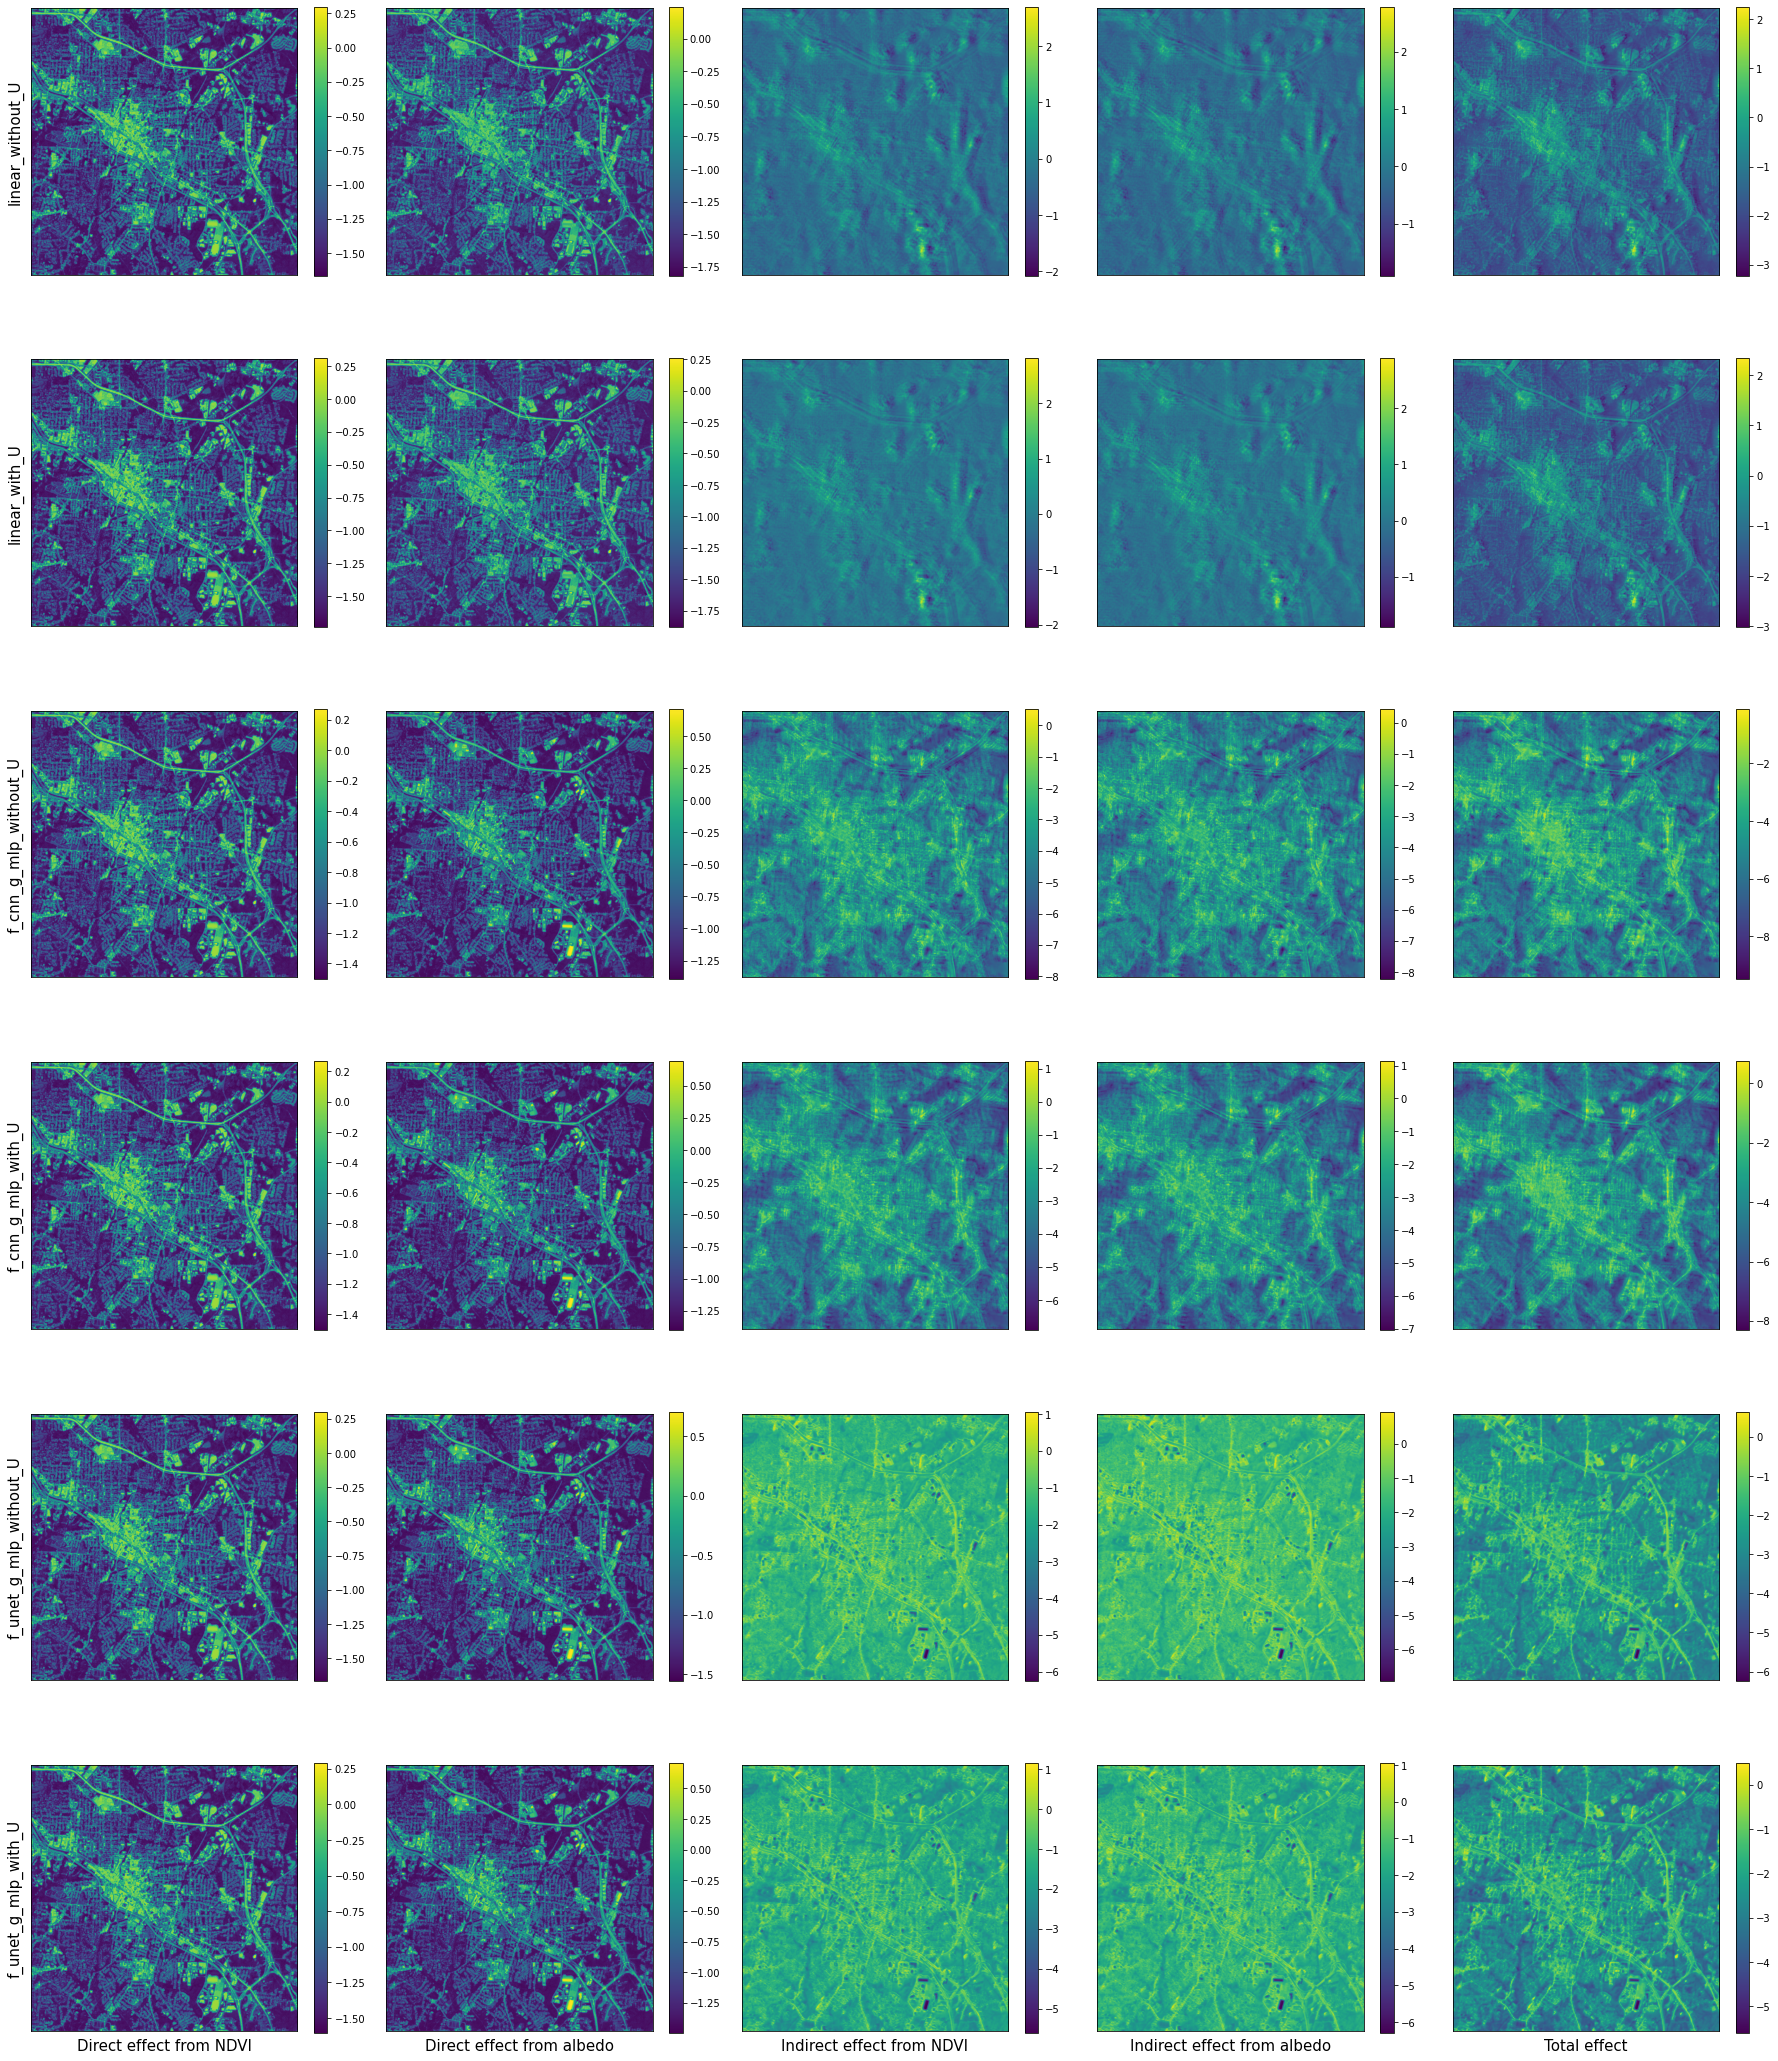

In [2]:
rows = [
    'linear_without_U',
    'linear_with_U', 
    'f_cnn_g_mlp_without_U', 
    'f_cnn_g_mlp_with_U', 
    'f_unet_g_mlp_without_U',
    'f_unet_g_mlp_with_U'
]
cols = ['de_ndvi', 'de_albedo', 'ie_ndvi', 'ie_albedo', 'te']
col_names = ['Direct effect from NDVI', 'Direct effect from albedo', 'Indirect effect from NDVI', 
             'Indirect effect from albedo', 'Total effect']

fig, axs = plt.subplots(6,5,figsize=(25,30))
for i in range(len(rows)):
    with open(f'./results/results_{rows[i]}.pkl', 'rb') as f:
        res = pickle.load(f)
    for j in range(len(cols)):
        img = res[cols[j]]
        im = axs[i][j].imshow(img,cmap=plt.cm.viridis)
        axs[i][j].set_xticks([])
        axs[i][j].set_yticks([])
        fig.colorbar(im,ax=axs[i][j],shrink=0.71)

for i in range(len(rows)):
    axs[i][0].set_ylabel(rows[i],fontsize=15)
for j in range(len(cols)):
    axs[-1][j].set_xlabel(col_names[j], fontsize=15)  
plt.tight_layout(h_pad=0.9,w_pad=0.9)
plt.savefig('./Causal_effect_visualizations.pdf', dpi=300)